<a href="https://colab.research.google.com/github/tai117/Metodos-Numericos-DCI/blob/main/ProyectoEDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movimiento armonico simple**
### **Longitud del pendulo 1.84m**
$$y = Acos(\omega t + \phi)$$

0.3541361855503258 cos( 2.2370958871559354 x +  -0.012660445013134949 )
R^2:  0.9948777937609128


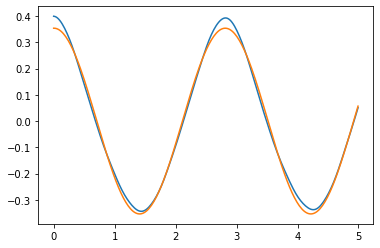

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
df = pd.read_csv('EDO.csv')
x = df['x1']
y = df['y1']
def mov(t,c0,c1,c2):
  return c0*np.cos(c1*t + c2)
g = [0.35,2.2,0]
t = x
c,cov = curve_fit(mov,t,y,g,maxfev = 10000)
print(c[0],'cos(',c[1],'x + ',c[2],')')
n = len(x)
yp = np.empty(n)
for i in range(n):
  yp[i] = mov(x[i],c[0],c[1],c[2])
plt.plot(x,y)
plt.plot(x,yp)
print('R^2: ', r2_score(yp,y))

# **Movimiento armonico sub amortiguado**
### **Longitud del pendulo 2.15m**
$$y = Ae^{-\beta t}cos(\omega t + \phi)$$

0.01474023692267211 e^(- 0.2190000621201906 x) cos( 4.756597320223826 x +  -0.094661924206521 )
R^2:  0.994419929596972


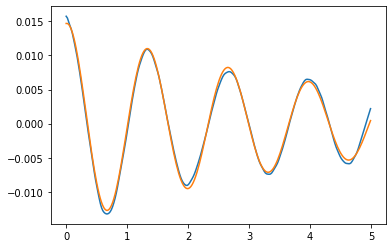

In [ ]:
df = pd.read_csv('EDO.csv')
x = df['x2']
y = df['y2']
def mov(t,c0,c1,c2,c3):
  return c0*np.exp(-c1*t)*np.cos(c2*t + c3)
g = [0.01,0.2,5,-0.01]
t = x
c,cov = curve_fit(mov,t,y,g,maxfev = 10000)
print(c[0],'e^(-',c[1],'x)','cos(',c[2],'x + ',c[3],')')
n = len(x)
yp = np.empty(n)
for i in range(n):
  yp[i] = mov(x[i],c[0],c[1],c[2],c[3])
plt.plot(x,y)
plt.plot(x,yp)
print('R^2: ', r2_score(yp,y))

# **Movimiento armonico sobre amortiguado**
### **Longitud del pendulo 0.8m**
$$y = Ae^{-\lambda_1 t} + Be^{-\lambda_2 t}$$

4.596708124734642 e^(- 0.8544340876610168 x) + -4.5613741721461 e^(- 0.8503044300393786 x) 
R^2:  0.9322914927148389


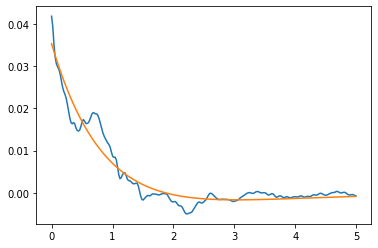

In [ ]:
df = pd.read_csv('EDO.csv')
x = df['x3']
y = df['y3']
def mov(t,c0,c1,c2,c3):
  return c0*np.exp(-c1*t) + c2*np.exp(-c3*t)
g = [0.7,4.5,-0.7,5.3]
t = x
c,cov = curve_fit(mov,t,y,g,maxfev = 10000)
print(c[0],'e^(-',c[1],'x)','+',c[2],'e^(-',c[3],'x) ')
n = len(x)
yp = np.empty(n)
for i in range(n):
  yp[i] = mov(x[i],c[0],c[1],c[2],c[3])
plt.plot(x,y)
plt.plot(x,yp)
print('R^2: ', r2_score(yp,y))